# Урок 2.

## Домашние задания

#### 1. 
Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [68]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams["figure.facecolor"] = "green"

In [69]:
X, y, coef = datasets.make_regression(n_samples=2000,
                                      n_features=6,
                                      n_informative=6,
                                      n_targets=1,
                                      noise=12,
                                      bias=20,
                                      coef=True,
                                      random_state=29)

bias_feat = np.array([1] * len(X)).reshape(-1,1)
X = np.concatenate((bias_feat, X), axis=1)
true_weig = np.concatenate(([20], coef))

In [3]:
def mse_err(y, y_pred):
    return (y-y_pred).T @ (y-y_pred) / len(y)

In [4]:
print(f'Ошибка mse по "истинным" коэффициентам:={mse_err(y, X @ true_weig):.4f}')

Ошибка mse по "истинным" коэффициентам:=136.9436


In [5]:
# frame = pd.DataFrame(np.concatenate((X[:,1:], y.reshape(-1,1)), axis=1), \
#                      columns=["feat1", "feat2", "feat3", "feat4", "feat5", "feat6", "targ"])

In [6]:
# sns.pairplot(frame)

<font color="grey">*ещё нужно стандартизацию данных сделать!*</font>

Так как выбросов особенно не заметно, а так же видно, что признаки распределены нормально подойдет стандартизация признаков.

In [7]:
def std_scaler(X):
    """Функция принимает, обрабатывает и возвращает 2-D arrays"""
    
    avrg = np.mean(X[:,1:], axis=0)
    dev = np.std(X[:,1:], axis=0, ddof=1) # unbiased standard deviation
    
    X_ = (X[:, 1:] - avrg) / dev
    X_std = np.column_stack((X[:,0], X_))
    
    return X_std

In [8]:
def grad_descent(X, y, eta=1e-3, max_iters=1e5): #weig_dist_min=1e-6):
    """Regular gradient descent function"""

    gd_res = []
    
    np.random.seed(9001)
    m = len(X[0])
    n = len(X)
    w_prev = np.random.randn(m)
    iter_num = 0
    weig_dist = np.inf
    err_prev = 0

    while (iter_num <= max_iters): #& (weig_dist_min <= weig_dist):
        y_pred = X @ w_prev.T
        err = mse_err(y, y_pred)
        
#         err_neuv = mse_err(y, y_pred)
        mse_diff = err_prev - err
        if abs(mse_diff) < 1e-6:
            pass #break
        err_prev = err

        w_neuv = w_prev - 2/n * eta * X.T @ (y_pred - y)
        weig_dist = np.linalg.norm(w_prev - w_neuv, ord=2)
        w_prev = w_neuv
        iter_num += 1
        if iter_num % 1e3 == 0:
            gd_res.append([iter_num, err])
        
    print(f"{iter_num}, {err:.4f}, {weig_dist}")
    return w_neuv, err, gd_res

In [9]:
grad_descent(std_scaler(X), y, eta=1e-3), true_weig

100001, 135.9492, 0.0


((array([23.53715732, 48.80953989, 76.4829416 , 16.46986324, 19.16583277,
          4.95159465, 47.71471055]),
  135.9492064144996,
  [[1000, 331.62912746063785],
   [2000, 139.38596723791724],
   [3000, 136.01239691176406],
   [4000, 135.9504258747643],
   [5000, 135.94923110038474],
   [6000, 135.94920693680558],
   [7000, 135.94920642598356],
   [8000, 135.9492064147602],
   [9000, 135.94920641450562],
   [10000, 135.94920641449974],
   [11000, 135.9492064144996],
   [12000, 135.9492064144996],
   [13000, 135.9492064144996],
   [14000, 135.9492064144996],
   [15000, 135.94920641449957],
   [16000, 135.94920641449957],
   [17000, 135.9492064144996],
   [18000, 135.9492064144996],
   [19000, 135.9492064144996],
   [20000, 135.9492064144996],
   [21000, 135.9492064144996],
   [22000, 135.9492064144996],
   [23000, 135.9492064144996],
   [24000, 135.9492064144996],
   [25000, 135.9492064144996],
   [26000, 135.9492064144996],
   [27000, 135.9492064144996],
   [28000, 135.9492064144996],

In [18]:
def stochastic_GD(X, y, eta=1e-6, max_iters=1e5): #, weig_dist_min=1e-6):
    
    sgd_res = []
    
#     np.random.seed(999)
    m = len(X[0])
    n = len(X)
    w_prev = np.random.randn(m)
    iter_num = 0
    weig_dist = np.inf
    err_prev = 0
    
    while (iter_num <= max_iters): #& (weig_dist_min <= weig_dist):
        ind = np.random.randint(n)
        y_pred = X[ind,:] @ w_prev.T
        w_neuv = w_prev - 2 * eta * (X[ind,:] * (y_pred - y[ind]))
        weig_dist = np.linalg.norm(w_neuv - w_prev, ord=2)
        w_prev = w_neuv
        iter_num += 1
        err = mse_err(y, X @ w_prev)
        
        mse_diff = err_prev - err
        if abs(mse_diff) < 1e-6:
            pass #break
        err_prev = err

        
        if iter_num % 1e3 == 0:
            sgd_res.append([iter_num, err])
#             print(f"{iter_num}, {err:.4f}, {w_prev}, {weig_dist:.6f}")
    
    print(f"{iter_num}, ошибка:={err:.4f}") #, дистанция: {weig_dist:.4f}, веса: {w_neuv}")

    return list(w_neuv), iter_num, err, eta, sgd_res

In [20]:
gd_res = np.array(grad_descent(std_scaler(X), y, eta=1e-3)[2])
sgd_res = np.array(stochastic_GD(std_scaler(X), y, eta=1e-3)[4])

100001, 135.9492, 0.0
100001, ошибка:=136.9295


2413, ошибка:=136.3829
10077, ошибка:=138.3423
5685, ошибка:=136.4466
16770, ошибка:=136.3519
5618, ошибка:=136.5987
13773, ошибка:=136.5824
3657, ошибка:=137.1423
19648, ошибка:=137.4990
6205, ошибка:=136.7203
8595, ошибка:=136.2949
6914, ошибка:=136.4602
7672, ошибка:=136.3425
2670, ошибка:=136.7551
5023, ошибка:=136.9494
4179, ошибка:=136.3336
13057, ошибка:=136.6963
3023, ошибка:=136.4095
5521, ошибка:=136.5302
7200, ошибка:=137.3999
4552, ошибка:=136.4128
10008, ошибка:=136.6578
7962, ошибка:=136.7170
2686, ошибка:=136.1148
18163, ошибка:=136.7388


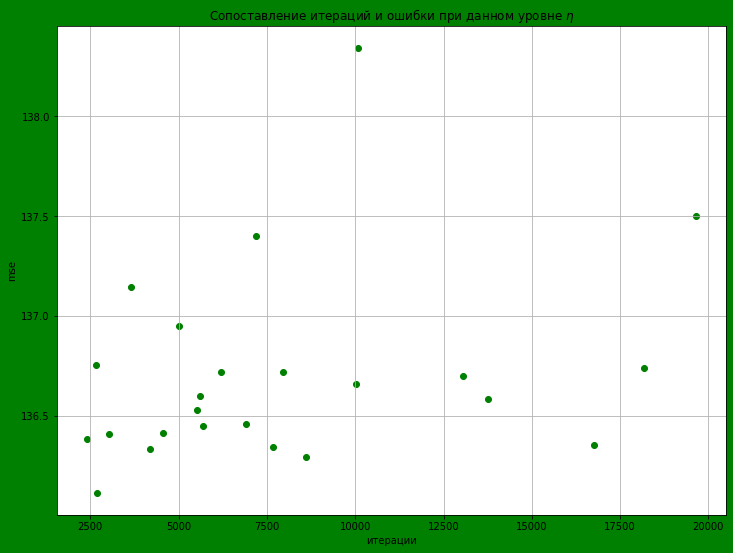

In [15]:
iters_errs_list = []
for i in range(24):
# sgd_res = np.array(stochastic_GD(std_scaler(X), y, eta=1e-3)[4])
    iters_errs_list.append(stochastic_GD(std_scaler(X), y, eta=1e-3)[1:3])
    
iters_errs_arr = np.array(iters_errs_list)
plt.figure(figsize=(12,9))
plt.scatter(iters_errs_arr[:,0], iters_errs_arr[:,1], c="g")
plt.title("Сопоставление итераций и ошибки при данном уровне $\eta$")
plt.xlabel("итерации")
plt.ylabel("mse")
plt.grid()
plt.show()

В ячейке выше я проводил серию реализаций (24) SGD для различных значений eta (их менял в ручную) и сравнивал как меняется устойчивость результатов которые выдавал алгоритм  SGD; Критерий останова был синтетический - по количеству итераций и по близости вычисленных весов на соседних итерациях.

На основе этих экспериментов делал выводы об устойчивости метода SGD.

В ячейке ниже средние, стандартные отклонения и медианы по результатам серии реализации SGD (для конкретного значения eta):

In [16]:
# для eta=1e-3
np.mean(iters_errs_arr, axis=0), np.std(iters_errs_arr, axis=0), np.median(iters_errs_arr, axis=0)

(array([7961.29166667,  136.70330102]),
 array([4.88456227e+03, 4.75298671e-01]),
 array([6559.5       ,  136.59058958]))

In [22]:
# средняя, медиана и отклонение ошибки обоих алгоритмов для 1e5 количества итераций:
print(f"SGD_algorithm: {np.mean(sgd_res[:,1]):.1f}, {np.std(sgd_res[:,1]):.4f}, {np.median(sgd_res[:,1]):.1f}")
print(f"GD_algorithm: {np.mean(gd_res[:,1]):.1f}, {np.std(gd_res[:,1]):.4f}, {np.median(gd_res[:,1]):.1f}")

SGD_algorithm: 139.3, 22.2907, 136.9
GD_algorithm: 137.9, 19.4694, 135.9


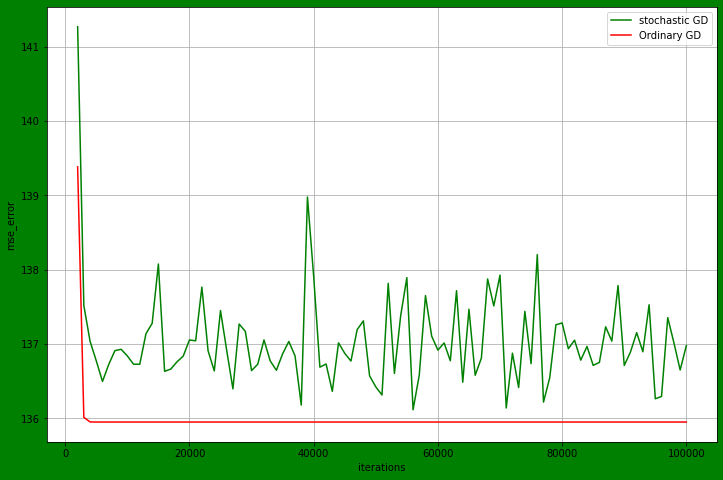

In [23]:
plt.figure(figsize=(12,8))
plt.plot(sgd_res[1:,0], sgd_res[1:,1], color="g", label="stochastic GD")
plt.plot(gd_res[1:,0], gd_res[1:,1], color="r", label="Ordinary GD")
# plt.xscale("log")
plt.xlabel("iterations")
plt.ylabel("mse_error")
plt.legend()
plt.grid()
plt.show()

<font color="green">Основной вывод: если правильно подобрать гиперпараметры, по алгоритм SGD даёт сопоставимые и приемлимые оценки параметров модели как и обычный GD, они более вариабельны, но достаточно устойчивы (опять же повторюсь если правльно подобрать гиперпараметры (шаг спуска)).</font>

Вывод 1: при больших весах $\eta$ (порядка 1e-2) стохастический метод показывает, меньшую, но приемлимую точность: mean(mse) = 146.9 (против 135.9 у обычного градиентного спуска), вокруг которой ошибка колеблется (std=8.5); Я сделал 1e5 количество итераций по умолчанию, но если сделать больше такая картина вряд ли изменится.

---
При $\eta$=1e-3 большинство оценок приемлемого качества, но встречаются выбросы. Медианная оценка по серии (из 24 "спусков") - Ок.

При $\eta$=1e-4 алгоритм стохатического градиентного спуска выдает очень неточные оценки (err$\approx$380 при истинном значении ошибки 136.9) и с большим отклонением ($\approx$500), появляются большие выбросы (ошибка 2000). Можно сделать вывод, что при таком значении $\eta$=1e4 оценки, которые выдает стохастическая модель никуда не годятся. Похоже, что оказывается число случайно когда у соседних весов оказывается разница ниже пороговой - тогда как алготитм еще не вышел на устойчивую траекторию.

При $\eta$=1e5, алгоритм по сути превращается в генератор случайных чисел, ровно никаких осмысленных оценок он не выдает.

Главный вывод для стохастического алгоритма - в том, что очень трудно полагаться на метрики расстояния (весов), разницы (ошибки) для завершения итераций. И еще раз скажу непонятно как нужно подбирать $\eta$ чтобы быть уверенным в оценках модели.

Наибольшая точность стохастического алгоритма на моих данных достигается при значении $\eta$=1e-3;

Будем сравниать оценки параметров алгоритмов GD и SGD на этом значении шага.

Как ведёт себя обычный градиентный спуск: при $\eta$=1e-2 - ему требуется 496 итераций чтобы получить прирост ошибки mse не более 1e-6; остальные итерации избыточны. Для шага $\eta$=1e-3 алгоритму обычного GD потребовалось порядка 4400 итераций, чтобы точность ошибки перестала увеличиваться более чем 1e-6 за один шаг. Для шага $\eta$=1e-4 потребовалось $\approx$ 38000 повторов цикла. Для $\eta$=1e-5 алгоритму обычного градиентного спуска не хватило 1e5 итераций чтобы достичь приемлимой точности однако картина ясная: <font color="red">__во всех этих случая алгоритм (GD) плавно и целенаправленно двигается к минимуму ошибки; его ничего не сбивает с пути, алгоритм выдает устойчивые метрики и оценки.__</font>

In [25]:
list(true_weig)

[20.0,
 47.50615775756908,
 77.10368102056397,
 16.51321869668676,
 19.70451175173077,
 4.883921071468899,
 48.10218720434786]

In [26]:
eta_list = np.logspace(-2, -5, num=4)
results = []
for eta in eta_list:
    results.append(stochastic_GD(std_scaler(X), y, eta=eta))

100001, ошибка:=141.6734
100001, ошибка:=136.8431
100001, ошибка:=136.0418
100001, ошибка:=341.0219


In [27]:
r = np.array(results)
r[:,1:4]

array([[100001, 141.6733526880124, 0.01],
       [100001, 136.8430713411615, 0.001],
       [100001, 136.0417931885644, 0.0001],
       [100001, 341.02193537145735, 1e-05]], dtype=object)

пришось отключить останов по близости веткоров весов (количество повторений везде сравнялось максимально заданному)

В ячейке ниже попытался продемонстрировать зависимость точности оценки от выбранного значения eta.
(ничего интересного((( )

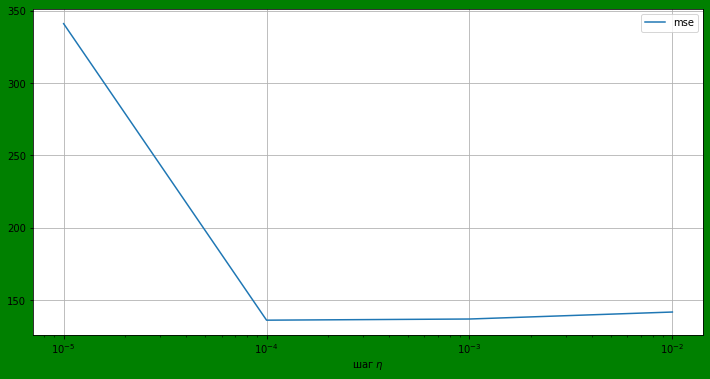

In [32]:
plt.figure(figsize=(12, 6))
plt.xscale("log")
# plt.yscale("log")

plt.plot(r[:,3], r[:,2], label="mse")
# plt.plot(r[:,3], r[:,1], label="iter_num")
plt.xlabel("шаг $\eta$")
plt.grid()
plt.legend()

plt.show()

Сразу хочу записать интересный вывод, который сделал пока делал стохастический градиентный спуск.
Результат, который выдает метод в зависимости от шага $\eta$ очень нестабильный. Т.е. если за критерий останова брать минимум расстояния между векторами весов на соседних итерациях, то стохастический метод на каждой градации шага выдает какой-то результат и заканчивает свою работу штатным образом (т.е. мы добиваемся требуемой близости весов), однако полученные параметры модели и ошибка далеки от оптимальных.

В то время как обычный градиентый спуск демонстрирует совсем другое поведение. В зависимости от шага алгоритму нужно разное колиество итераций, но он выдает <s>годные</s> значимые результаты, на которые можно положиться.

А на стохастический метод трудно положиться. Т.е. сейчас я знаю, как выглядят истинные веса и ошибка модели. А если я не знаю "истинных" коэффициентов - будет очень трудно быть уверенным, что я получил релевантные оценки параментов модели.

Ещё раз неприятный сюрприз стохастического метода поджидает, если пользоваться критерием останова на основе близости векторов весов на соседних итерациях - равно как и на основе близости значений ошбики mse на соседних итерациях. Если задавать критерием останова количество итераций, то поведение стохастического метода предсказуемое, ожидаемое и "похожее" на обычный градиентныый спуск (с ньюансами описанными выше). Другой вопрос как подобрать заранее необходимое количество итераций и параметр eta? GridSearch...

#### 2. 
[\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).  

In [111]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]]).T  # возраст репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [112]:
X_std = std_scaler(X)
# X_std

Что такое производная от нормы Евклида? Как мы выяснили на уроке это удвоенный вектор состоящий из коэфициентов (координат) вектора весов, т.е. это: $2\cdot w = 2[w_0, w_1, \cdots, w_n]$.

Что же тогда градиент от L1-нормы? Модуль всюду непрерывная функция, но недифференцируемая в нуле. Следовательно функцию производной от модуля нужно доопределять. Обычно для этого используется функция `sgn()`;

В нашем случае градиент от L1-нормы будет вектор состоящий из элементов бинарного множества: $\{-1,+1\}$, т.е. из единиц или минус-единиц. Есть еще ньюанс с нулем, только вот на практике точное равенство нулю это скорее случайность - обычно в практическом смысле 0 это очень малое число. Не уверен, что нужно загоняться с нулем сейчас - возможно, конечно, это как-то может сыграть, но просто отметим это для себя здесь.

Для вычисления вектора градиента для L1-нормы воспользуемся выражением для генератора списков (list comprehensive).

```
def sgn_func(vec):
    derivative_vec = []
    for v in vec:
        if v > 0:
            derivative_vec.append(1)
        else:
            derivative_vec.append(-1)
 ```
 
[Генераторы циклов с условием](https://pyprog.pro/python/py/list/list_generat.html)
`[1 if v > 0 else -1 for v in vec]`

In [113]:
def GD_lasso_reg1(X, y, iterations=1e3, eta=1e-3, lambda_=1e-8):
    """Обычный градиентный спуск с L1 регуляризацией"""
    
    np.random.seed(5892)
    m = X.shape[1]
    n = X.shape[0]
    w_prev = np.random.rand(m)
    iter_num = 0
    
    while iter_num < iterations:
        y_pred = X @ w_prev.T
        err = mse_err(y, y_pred)
        w_neuv = w_prev - eta * (2/n * X.T @ (y_pred - y) + \
                    [lambda_ * 1. if v > 0 else lambda_ * -1. for v in w_prev])
        iter_num += 1
        w_prev = w_neuv
        
#     print(f"{w_neuv}, {err:.1f}")
    return w_prev, err

In [114]:
GD_lasso_reg1(X_std, y)

[49.72536506  4.33605141  4.53717425  2.96942125], 104.3


(array([49.72536506,  4.33605141,  4.53717425,  2.96942125]), 104.296581690409)

In [121]:
lamb_list = []
weig_list = []
errs_list = []

for lambda_ in np.logspace(-4, 1, 24):
    lamb_list.append(lambda_)
    w_, e_ = GD_lasso_reg1(X_std, y, lambda_=lambda_, eta=1e-2)
    weig_list.append(w_)
    errs_list.append(e_)
    
lamb_arr = np.array(lamb_list)
weig_arr = np.array(weig_list)
errs_arr = np.array(errs_list)

[57.3999499   7.08885127  5.04504756 -0.26233268], 43.0
[57.39991742  7.08880955  5.04500129 -0.26225801], 43.0
[57.39986384  7.08874073  5.04492495 -0.26213485], 43.0
[57.39977544  7.0886272   5.04479902 -0.26193167], 43.0
[57.39962962  7.08843991  5.04459128 -0.26159649], 43.0
[57.39938907  7.08813095  5.04424858 -0.26104357], 43.0
[57.39899224  7.08762129  5.04368325 -0.26013144], 43.0
[57.39833761  7.08678051  5.04275066 -0.25862675], 43.0
[57.3972577   7.08539353  5.0412122  -0.25614455], 43.0
[57.39547623  7.08304113  5.03863497 -0.25194515], 43.0
[57.39253743  7.07922487  5.03442276 -0.24512225], 43.0
[57.38768944  7.07275413  5.0273675  -0.23358255], 43.0
[57.37969197  7.06167623  5.01548568 -0.21389439], 43.0
[57.36649897  7.04302466  4.99566205 -0.18081219], 43.0
[57.34473515  7.01005418  4.96166546 -0.12271943], 43.0
[ 5.73088325e+01  6.95618307e+00  4.90606218e+00 -2.79257183e-02], 43.1
[ 5.72496058e+01  6.92283265e+00  4.85485075e+00 -3.56732050e-03], 43.1
[ 5.71519025e+01

неверно вызвал функция `plt.xlabel()` пришлось перезагружать функцию.

```
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)```

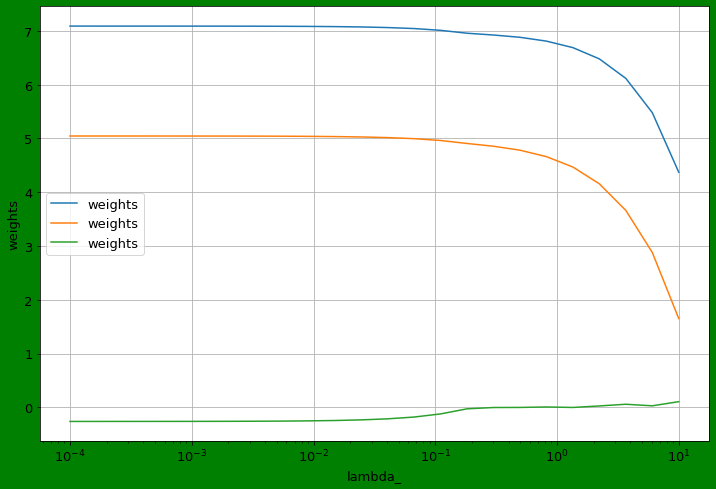

In [123]:
plt.rcParams["font.size"] = 13
plt.figure(figsize=(12,8))
plt.xscale("log")
plt.plot(lamb_arr, weig_arr[:,1:], label="weights")
plt.xlabel("lambda_")
plt.ylabel('weights')
plt.legend()
plt.grid()
plt.show()

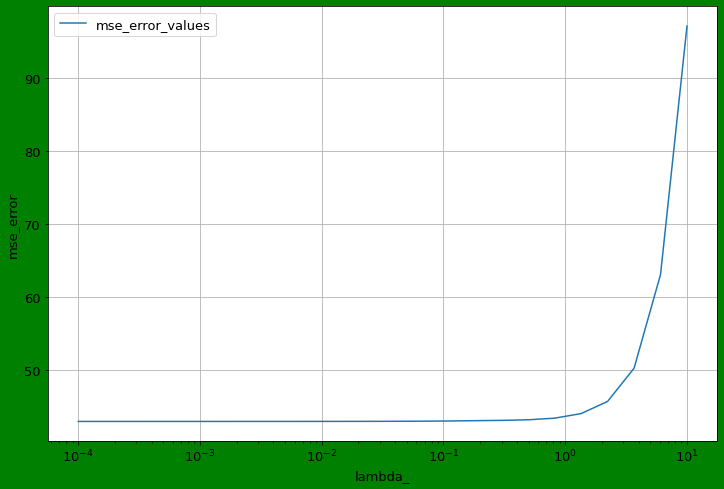

In [124]:
plt.figure(figsize=(12,8))
plt.xscale("log")
plt.plot(lamb_arr, errs_arr, label="mse_error_values")
plt.xlabel("lambda_")
plt.ylabel("mse_error")
plt.legend()
plt.grid()
plt.show()

<font color="blue" size=3>Вывод напрашивается довольно простой: с ростом коэффицента регуляризации $\lambda$ веса уменьшаются (стремятся к нулю), ошибка увеличиватся. При $\eta=.01$ этот эффект ещё более выражен.</font>

То различие между этими вариантами регуляризации о которых говорится в теоретической литературе и о которых мы говорили на уроке - а именно, что L1-регуляразация в отличии от L2 зануляет некоторые веса - на этих данных, в этом примере неочевидно такая тенденция, во всяком случае не бросается в глаза))).